In [5]:
import os
import torch
import torchvision.transforms as transforms
from PIL import Image
import pandas as pd
from torchvision import models
import torch.nn as nn

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Load full model object 
model = torch.load("mobV2_full.pth", map_location=device, weights_only=False)

model = model.to(device)
model.eval()

print("✓ Model loaded successfully")

✓ Model loaded successfully


In [6]:
import os
import torch
import torchvision.transforms as transforms
from PIL import Image
import pandas as pd
from datetime import timedelta

# Define path to frames
frame_dir = "video_frames"

# Define class labels in order used by the model
emotion_labels = ['Neutral', 'Happiness', 'Surprise', 'Sadness', 'Anger', 'Disgust', 'Fear']

# Image preprocessing pipeline 
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],
                         std=[0.229, 0.224, 0.225])
])

results = []

# Loop through frames
for idx, frame_file in enumerate(sorted(os.listdir(frame_dir))):
    if frame_file.endswith(".jpg"):
        img_path = os.path.join(frame_dir, frame_file)
        image = Image.open(img_path).convert("RGB")
        input_tensor = transform(image).unsqueeze(0).to(device)

        with torch.no_grad():
            output = model(input_tensor)
            predicted_class = torch.argmax(output, dim=1).item()
            predicted_label = emotion_labels[predicted_class]

        # Create timestamp (since 1 frame per second, index = seconds)
        timestamp = str(timedelta(seconds=idx))  # e.g. "0:00:05"

        results.append({
            "frame": frame_file,
            "timestamp": timestamp,
            "emotion": predicted_label
        })

# Save results to CSV
df = pd.DataFrame(results)
df.to_csv("emotion_predictions_with_timestamps.csv", index=False)

print("✓ Inference complete. Results saved to 'emotion_predictions_with_timestamps.csv'")

✓ Inference complete. Results saved to 'emotion_predictions_with_timestamps.csv'


In [7]:
import pandas as pd

df = pd.read_csv("emotion_predictions_with_timestamps.csv")

In [8]:
from IPython.display import display

display(df)

,frame,timestamp,emotion
0,frame_0000.jpg,0:00:00,Anger
1,frame_0001.jpg,0:00:01,Anger
2,frame_0002.jpg,0:00:02,Anger
3,frame_0003.jpg,0:00:03,Anger
4,frame_0004.jpg,0:00:04,Anger
5,frame_0005.jpg,0:00:05,Anger
6,frame_0006.jpg,0:00:06,Anger
7,frame_0007.jpg,0:00:07,Anger
8,frame_0008.jpg,0:00:08,Anger
9,frame_0009.jpg,0:00:09,Anger


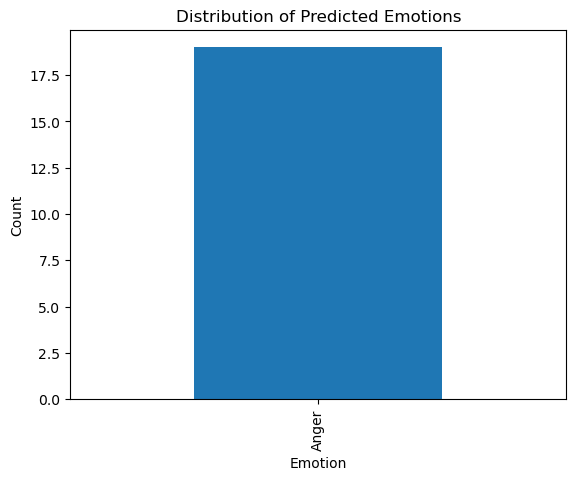

In [9]:
import matplotlib.pyplot as plt

emotion_counts = df['emotion'].value_counts()
emotion_counts.plot(kind='bar', title="Distribution of Predicted Emotions")
plt.xlabel("Emotion")
plt.ylabel("Count")
plt.show()